In [76]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
response = requests.get("https://api.teleport.org/api/urban_areas")
response

<Response [200]>

In [4]:
data = response.json()

In [5]:
data.keys()

dict_keys(['_links', 'count'])

In [6]:
all_cities = data['_links']['ua:item']

In [7]:
all_names = [i['name'] for i in all_cities]

In [8]:
# all_names = []
# for i in all_cities:
#     name = i['name']
#     all_names.append(name)

In [9]:
href = [i['href'] for i in all_cities]

In [10]:
dfs = []

for x in href:
    url = x + 'scores/'
    resp = requests.get(url)
    columns = [x['name'] for x in resp.json()['categories']]
    data = [x['score_out_of_10'] for x in resp.json()['categories']]
    df = pd.DataFrame(data).T
    df.columns = columns
    dfs.append(df)

In [11]:
data = pd.concat(dfs)

In [12]:
data['City Name'] = all_names

In [13]:
data.set_index('City Name', inplace=True)

In [14]:
data.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
City Name,,,,,,,,,,,,,,,,,
Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,9.149667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [15]:
data['Outdoor/Quality'] = (data['Environmental Quality'] + data['Outdoors']) / 2

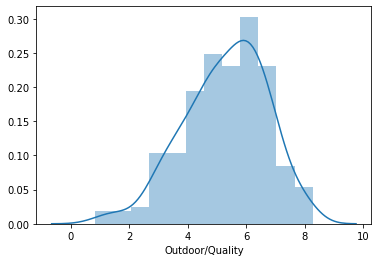

In [17]:
sns.distplot(data['Outdoor/Quality']);

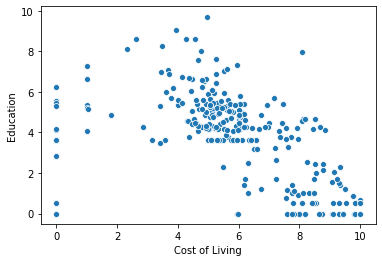

In [20]:
sns.scatterplot(data['Cost of Living'], data['Education'])

In [21]:
data['Cost of Living'].describe()

count    266.000000
mean       5.745940
std        2.447104
min        0.000000
25%        4.795000
50%        5.630500
75%        7.595500
max       10.000000
Name: Cost of Living, dtype: float64

In [22]:
data[data['Cost of Living'] == 0]

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Andorra,3.9690,0.0,1.0000,0.000,0.5000,0.00000,0.000000,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,7.1860,2.1320,8.7035,3.5885,5.422250
Bali,5.0000,0.0,1.6280,0.000,1.9300,5.19350,3.912333,8.7475,2.682333,0.5275,4.13775,4.6575,6.2660,3.2375,6.3335,4.5590,7.5005,5.819125
Belize City,4.6425,0.0,1.8660,0.000,0.8900,0.00000,3.411000,6.0520,3.772000,0.0000,2.03100,3.4960,6.9300,3.8075,1.0645,6.8650,0.5000,1.265500
Bozeman,2.9490,0.0,3.4070,0.000,1.1905,0.00000,8.671000,6.9145,8.885333,4.1280,9.36900,6.5145,4.0620,5.1560,1.9070,7.2935,6.1340,7.751500
Fort Collins,2.7445,0.0,4.0435,0.000,1.1020,2.00750,8.671000,6.9355,8.893333,4.1735,9.95325,6.5145,4.3460,5.3020,2.7460,9.4800,6.1865,8.069875
Fukuoka,4.0100,0.0,1.4840,1.790,6.1725,0.00000,8.389667,9.9450,9.385333,5.5275,7.91600,3.7235,6.0330,4.5750,5.8605,7.2590,5.6815,6.798750
Gibraltar,1.1120,0.0,2.8420,1.566,0.7580,0.00000,0.000000,9.3375,0.706333,0.0000,5.18350,0.0000,2.9130,4.2960,2.2350,4.4265,4.7565,4.970000
Kyoto,3.7650,0.0,1.3025,0.000,6.7945,2.50000,8.389667,10.0000,9.464333,6.2410,6.43500,3.7235,6.0330,3.7120,8.1535,7.6630,1.6465,4.040750
La Paz,4.7240,0.0,1.4975,0.000,1.3190,3.83425,3.482000,6.7505,2.566000,0.0000,1.73375,4.5360,4.5490,1.5480,1.5250,6.2930,5.5000,3.616875


In [23]:
dropped_cost = data[data['Cost of Living'] != 0.0]
dropped_cost

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300,5.881500
Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,9.149667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,6.930875
Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155,5.417500
Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000,4.678375
Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,6.452125
Anchorage,5.4335,3.141,2.7945,0.000,1.7380,4.71525,8.671000,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,4.9645,3.2660,7.0930,5.3580,7.315000
Ankara,9.9280,9.125,3.9725,0.000,2.0475,5.29100,5.948333,7.4250,5.703000,2.0285,2.93600,4.0935,4.3235,2.3160,8.6385,4.4855,5.1465,4.041250
Asheville,5.8560,5.311,3.5405,0.000,1.2095,1.35800,8.671000,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,4.7875,5.0630,7.7305,2.2655,5.379375
Asuncion,9.2265,9.295,2.2070,0.000,0.6450,4.96875,3.684000,6.9345,4.891333,0.0000,3.96900,4.1090,8.4235,1.4790,5.9920,7.0515,3.4845,3.726750


In [24]:
dropped_cost[dropped_cost['Education'] == 0]

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Asuncion,9.2265,9.295,2.2070,0.000,0.6450,4.96875,3.684000,6.9345,4.891333,0.0,3.96900,4.1090,8.4235,1.4790,5.9920,7.0515,3.4845,3.726750
Baku,9.7450,9.806,2.6705,0.000,2.1690,5.49200,5.671667,8.7720,3.707667,0.0,2.62125,3.8765,5.8610,1.4420,6.2195,6.5845,4.5030,3.562125
Caracas,4.9025,9.820,3.0535,0.000,1.3235,4.54425,1.000000,5.2210,4.241333,0.0,2.27250,1.9780,4.1800,1.6415,4.3800,4.5505,4.0985,3.185500
Casablanca,8.8220,9.088,3.0975,0.000,2.9145,4.26000,5.614333,6.7755,3.596667,0.0,2.25550,3.1735,3.2995,2.0670,2.6830,2.9450,3.9935,3.124500
Dar es Salaam,7.6520,8.026,2.6875,3.191,1.4535,2.07575,3.288667,6.1005,1.780000,0.0,2.08025,5.5000,4.4970,1.1100,1.2050,2.7665,4.3535,3.216875
Guatemala City,8.8125,8.175,2.6410,1.673,0.8145,0.52375,4.617000,6.1390,3.565000,0.0,3.75775,3.8050,8.5050,2.5060,5.1645,7.1570,4.1335,3.945625
Havana,9.0890,7.608,1.4975,0.000,1.9190,0.00000,1.643333,8.6335,5.535667,0.0,3.86225,2.5495,0.5000,1.7030,2.0700,8.7595,5.0225,4.442375
Hyderabad,10.0000,10.000,8.7245,3.585,3.8410,4.63200,3.618000,8.1265,2.390333,0.0,2.84050,5.5565,3.4145,5.5400,4.2710,4.1325,3.2085,3.024500
Kathmandu,10.0000,9.445,3.2110,0.000,1.0410,5.34900,4.740333,8.5055,2.311000,0.0,1.00000,4.4960,5.5130,2.2010,5.0390,9.1290,3.7980,2.399000


In [48]:
dropped_cost_edu = dropped_cost[dropped_cost['Education'] != 0.0]
dropped_cost_edu

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300,5.881500
Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,9.149667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,6.930875
Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155,5.417500
Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000,4.678375
Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,6.452125
Anchorage,5.4335,3.141,2.7945,0.000,1.7380,4.71525,8.671000,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,4.9645,3.2660,7.0930,5.3580,7.315000
Ankara,9.9280,9.125,3.9725,0.000,2.0475,5.29100,5.948333,7.4250,5.703000,2.0285,2.93600,4.0935,4.3235,2.3160,8.6385,4.4855,5.1465,4.041250
Asheville,5.8560,5.311,3.5405,0.000,1.2095,1.35800,8.671000,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,4.7875,5.0630,7.7305,2.2655,5.379375
Athens,9.0525,6.500,4.4040,2.325,3.7070,5.21975,6.169000,6.7585,7.258333,3.1625,3.80225,3.3200,4.1665,2.2280,7.8760,6.2680,6.4830,5.142625


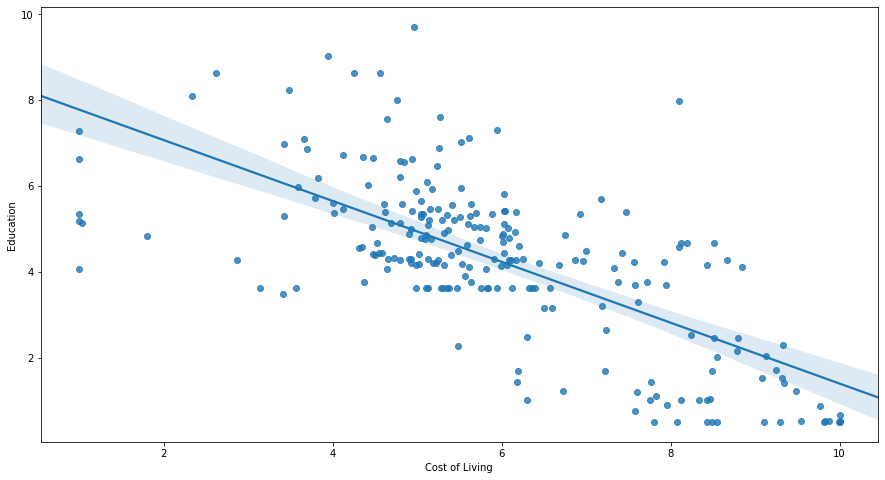

In [73]:
plt.figure(figsize=(15,8));
sns.regplot(dropped_cost_edu['Cost of Living'], dropped_cost_edu['Education']);

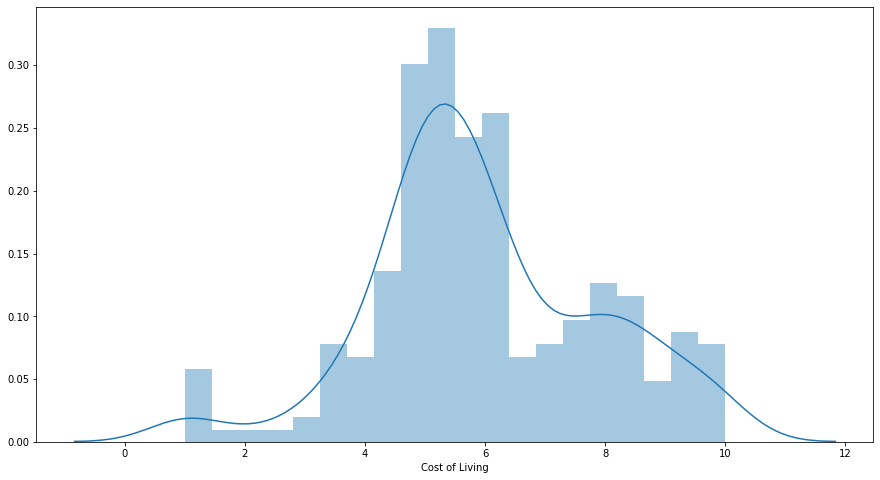

In [74]:
plt.figure(figsize=(15,8));
sns.distplot(dropped_cost_edu['Cost of Living'], bins=20);

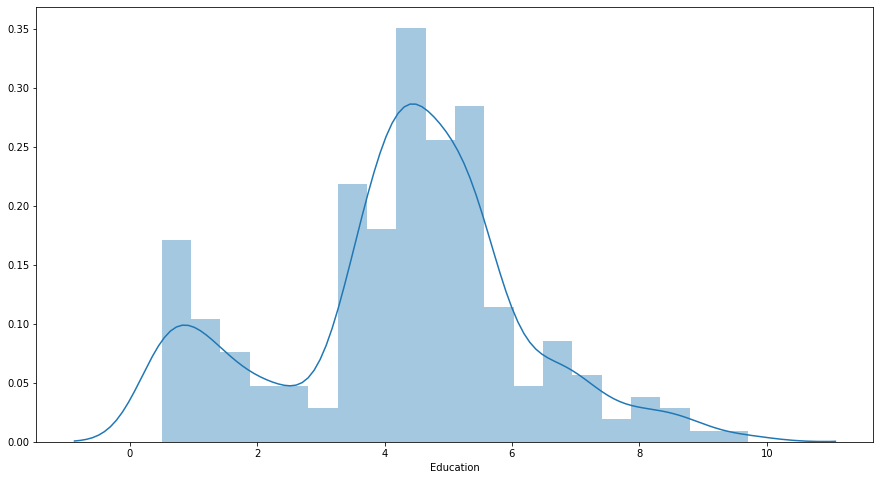

In [75]:
plt.figure(figsize=(15,8));
sns.distplot(dropped_cost_edu['Education'], bins=20);

In [57]:
dropped_cost_edu[dropped_cost_edu['Education'] > 8].head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Boston,1.0000,4.259,9.565,10.000,3.2150,4.39625,8.671000,7.7420,8.956000,8.6245,8.17050,6.5145,4.0620,5.7005,8.5640,8.4815,5.6600,6.915250
Hong Kong,1.0000,4.967,8.343,8.314,3.6790,5.54025,9.294333,9.3505,2.405000,9.7110,4.53325,6.4825,8.3805,6.2275,7.0585,7.1520,5.7960,5.164625
London,1.0000,3.940,10.000,9.859,9.4025,5.39550,8.992000,7.2435,8.150000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745,5.461125
Los Angeles,1.5275,4.556,10.000,10.000,3.9585,3.67700,8.574667,5.7050,8.439667,8.6245,4.73150,6.5145,4.7675,5.4965,9.1960,6.9600,6.7470,5.739250
New York,1.0000,2.342,10.000,10.000,6.6750,5.51925,8.671000,7.0220,8.501667,8.0935,5.23375,6.5145,3.9205,7.0985,10.0000,6.7125,5.7475,5.490625


In [61]:
dropped_cost_edu[dropped_cost_edu['Cost of Living'] > 9.5].head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Outdoor/Quality
City Name,,,,,,,,,,,,,,,,,,
Bengaluru,9.8110,10.000,10.0000,8.973,4.0640,4.00625,3.618000,7.2940,2.464667,0.6560,2.75575,5.5565,3.4145,2.8410,3.2215,3.4845,2.3850,2.570375
Cairo,10.0000,10.000,5.0985,2.958,3.7575,3.99025,5.790667,6.7910,2.897333,0.5000,1.15550,2.9780,5.1010,2.4050,6.1855,2.6500,0.5000,0.827750
Chennai,10.0000,10.000,7.1040,3.782,4.2080,4.84200,3.618000,7.8370,2.466667,0.5115,2.39450,5.5565,3.4145,6.8255,2.2275,4.5500,4.1980,3.296250
Delhi,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,6.4185,2.256333,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,1.690750
Kiev,9.0845,9.817,4.0495,2.545,5.4875,5.16075,4.525333,7.2555,3.695667,0.5000,3.66650,1.2755,5.4780,6.0415,8.4195,6.8270,5.3490,4.507750


In [29]:
# Null hypothesis = the higher the cost of living in a cities has no effect on education
# Alternative hypothesis = a higher cost of living will result in better education 

In [44]:
dropped_cost_edu['Education'].describe()

count    229.000000
mean       4.258179
std        1.929332
min        0.500000
25%        3.624500
50%        4.393500
75%        5.345500
max        9.711000
Name: Education, dtype: float64

In [45]:
dropped_cost_edu['Cost of Living'].describe()

count    229.000000
mean       5.963904
std        1.878591
min        1.000000
25%        4.927000
50%        5.623000
75%        7.237000
max       10.000000
Name: Cost of Living, dtype: float64

In [81]:
edu_val = np.asarray(dropped_cost_edu['Education'])
liv_val = np.asarray(dropped_cost_edu['Cost of Living'])

In [83]:
scipy.stats.ttest_ind(liv_val, edu_val)

Ttest_indResult(statistic=9.585503433098653, pvalue=6.007942423971899e-20)